In [352]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [353]:
mdf = pd.read_csv('/Users/algrhythm/Flatiron/Projects/DCDS-MOD1---MS-Movies/data/processed/movies_0304_1851.csv')
mdf['roi'] = mdf['domestic_profit'] / mdf['production_budget'] * 100
aa = mdf.loc[mdf['film_type'] == 'Action/Adventure']

rating_profit = aa[['Title', 'Rated', 'domestic_profit', 'roi', 'production_budget', 'release_month']]
rating_profit

,Title,Rated,domestic_profit,roi,production_budget,release_month
0,Star Wars: Episode VII - The Force Awakens,PG-13,630662225,206.098766,306000000,Dec
1,Black Panther,PG-13,500059566,250.029783,200000000,Feb
2,Jurassic World,PG-13,437270625,203.381686,215000000,Jun
3,Incredibles 2,PG,408581744,204.290872,200000000,Jun
4,Avengers: Infinity War,PG-13,378815482,126.271827,300000000,Apr
6,Rogue One: A Star Wars Story,PG-13,332177324,166.088662,200000000,Dec
7,Jumanji: Welcome to the Jungle,PG-13,314508916,349.454351,90000000,Dec
8,Deadpool,R,305070709,525.983981,58000000,Feb
9,Star Wars: Episode VIII - The Last Jedi,PG-13,303181382,95.640815,317000000,Dec
13,Wonder Woman,PG-13,262563408,175.042272,150000000,Jun


In [354]:
rating_profit['Rated'].describe()

count        21
unique        3
top       PG-13
freq         17
Name: Rated, dtype: object

In [355]:
rg = rating_profit.groupby(['Rated']).sum()
rg = rg.sort_values(by='domestic_profit', ascending=False)

In [356]:
rg

,domestic_profit,roi,production_budget
Rated,,,
PG-13,4725833096,2409.930855,3578600000
R,669762498,806.838836,343000000
PG,408581744,204.290872,200000000


In [357]:
rg.reset_index
rg['mpaa'] = rg.index
rg['count'] = [1, 17, 3]
rg['agg_roi'] = rg['domestic_profit'] / rg['production_budget']
# rg = rg.sort_values(by='count', ascending=True)

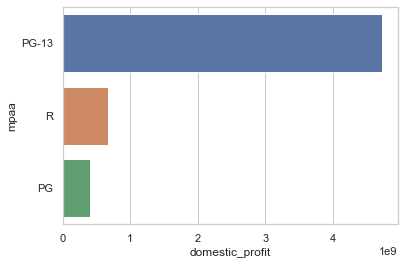

In [358]:
# aa.sort_values(by='domestic_profit')
sns.barplot(data=rg, x='domestic_profit', y='mpaa', ci=None)
# sns.barplot(data=aa, x='roi', y='Rated')
#average domestic profit per MPAA Rating

In [359]:
# sns.barplot(data=rg, x='agg_roi', y='mpaa', ci=None)

In [360]:
months = rating_profit.groupby(['release_month']).sum()
months = months.sort_values(by='domestic_profit', ascending=False)
months['Release Month'] = months.index

months['Aggregate ROI'] = months['domestic_profit'] / months['production_budget'] * 100


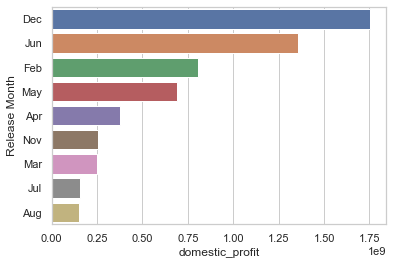

In [361]:
months = months.sort_values(by='domestic_profit', ascending=False)
sns.barplot(data=months, x='domestic_profit', y='Release Month', ci=None)

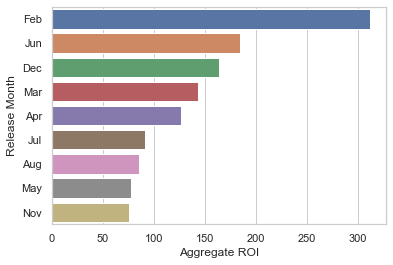

In [362]:
months = months.sort_values(by='Aggregate ROI', ascending=False)
sns.barplot(data=months, x='Aggregate ROI', y='Release Month', ci=None)

In [363]:
pg13 = aa.loc[aa['Rated'] == 'PG-13']
pg13.head(3)

,Unnamed: 0,Title,Year,release_month,Rated,Runtime,Metascore,imdbRating,imdbVotes,production_budget,domestic_gross,domestic_profit,genres,primary_genre,secondary_genre,tertiary_genre,film_type,imdbID,roi
0,0,Star Wars: Episode VII - The Force Awakens,2015,Dec,PG-13,138 min,81.0,7.9,"826,625",306000000,936662225,630662225,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,Action/Adventure,tt2488496,206.098766
1,1,Black Panther,2018,Feb,PG-13,134 min,88.0,7.3,"565,951",200000000,700059566,500059566,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Action/Adventure,tt1825683,250.029783
2,2,Jurassic World,2015,Jun,PG-13,124 min,59.0,7.0,"556,312",215000000,652270625,437270625,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Action/Adventure,tt0369610,203.381686


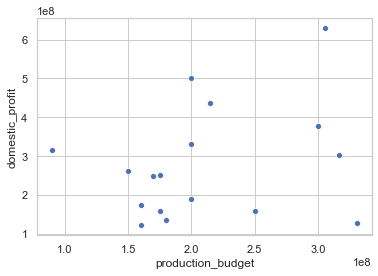

In [364]:
sns.scatterplot(data=pg13, x='production_budget', y='domestic_profit')

In [365]:
x = np.array(pg13['production_budget']).reshape((-1, 1))
y = np.array(pg13['domestic_profit'])

In [366]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('intercept:', model.intercept_)

coefficient of determination: 0.07230661503903135
intercept: 157774922.27760774
intercept: 157774922.27760774
